#  Capstone Project : Flight Fare Prediction

_By: Nurfarah Izzati Binti Ahmad Yusoff_

## Data Cleaning

In [84]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [85]:
# Load the dataset
df = pd.read_excel("Data_Train.xlsx")

In [86]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [87]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [88]:
df.shape

(10683, 11)

In [89]:
pd.set_option('display.max_columns', None)
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [91]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [92]:
# Drop rows with na values
df.dropna(inplace=True)
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [93]:
df['Duration'].value_counts()

Duration
2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: count, Length: 368, dtype: int64

## EDA (Exploratory Data Analysis)

In [94]:
# Convert 'Date_of_Journey' to datetime format
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y')

In [95]:
# Extract day and month from 'Date_of_Journey'
df['Journey_Day'] = df['Date_of_Journey'].dt.day
df['Journey_Month'] = df['Date_of_Journey'].dt.month

# Drop it as now we will not use it
df.drop(['Date_of_Journey'], axis = 1, inplace = True)

In [96]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [97]:
# Convert 'Dep_Time' to datetime format and extract hour and minute
df['Dep_Hour'] = pd.to_datetime(df['Dep_Time']).dt.hour
df['Dep_Min'] = pd.to_datetime(df['Dep_Time']).dt.minute

# Drop the 'Dep_Time' column as it is no longer needed
df.drop(['Dep_Time'], axis=1, inplace=True)

# Display the first few rows to verify changes
print(df.head())

       Airline    Source Destination                  Route  Arrival_Time  \
0       IndiGo  Banglore   New Delhi              BLR → DEL  01:10 22 Mar   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR         13:15   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK  04:25 10 Jun   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR         23:30   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL         21:35   

  Duration Total_Stops Additional_Info  Price  Journey_Day  Journey_Month  \
0   2h 50m    non-stop         No info   3897           24              3   
1   7h 25m     2 stops         No info   7662            1              5   
2      19h     2 stops         No info  13882            9              6   
3   5h 25m      1 stop         No info   6218           12              5   
4   4h 45m      1 stop         No info  13302            1              3   

   Dep_Hour  Dep_Min  
0        22       20  
1         5       50  
2    

C:\Users\user\AppData\Local\Temp\ipykernel_16376\2886649568.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dep_Hour'] = pd.to_datetime(df['Dep_Time']).dt.hour
C:\Users\user\AppData\Local\Temp\ipykernel_16376\2886649568.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dep_Min'] = pd.to_datetime(df['Dep_Time']).dt.minute


In [98]:
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [99]:
# Convert 'Arrival_Time' to datetime format and extract hour and minute
df['Arrival_Hour'] = pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arrival_Min'] = pd.to_datetime(df['Arrival_Time']).dt.minute

# Drop the 'Arrival_Time' column as it is no longer needed
df.drop(['Arrival_Time'], axis=1, inplace=True)

# Display the first few rows to verify changes
print(df.head())

       Airline    Source Destination                  Route Duration  \
0       IndiGo  Banglore   New Delhi              BLR → DEL   2h 50m   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR   7h 25m   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK      19h   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR   5h 25m   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL   4h 45m   

  Total_Stops Additional_Info  Price  Journey_Day  Journey_Month  Dep_Hour  \
0    non-stop         No info   3897           24              3        22   
1     2 stops         No info   7662            1              5         5   
2     2 stops         No info  13882            9              6         9   
3      1 stop         No info   6218           12              5        18   
4      1 stop         No info  13302            1              3        16   

   Dep_Min  Arrival_Hour  Arrival_Min  
0       20             1           10  
1       50        

C:\Users\user\AppData\Local\Temp\ipykernel_16376\2512039512.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Arrival_Hour'] = pd.to_datetime(df['Arrival_Time']).dt.hour
C:\Users\user\AppData\Local\Temp\ipykernel_16376\2512039512.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Arrival_Min'] = pd.to_datetime(df['Arrival_Time']).dt.minute


In [100]:
# Convert 'Duration' column
duration=list(df['Duration'])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"  # Adds 0 minutes
        else:
            duration[i] = "0h " + duration[i]          # Adds 0 Hours
            
Duration_Hour = []
Duration_Min = []

for i in range(len(duration)):
    Duration_Hour.append(int(duration[i].split("h")[0])) # Extract hours from duration
    Duration_Min.append(int(duration[i].split("m")[0].split()[-1])) # Extracts only minutes from duration

In [101]:
df['Duration_Hour']=Duration_Hour
df['Duration_Min']=Duration_Min

In [102]:
df.drop('Duration',axis=1,inplace=True)

In [103]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Hour,Duration_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


### Handling Categorical Data

##### Column 1 : Airline

In [104]:
df['Airline'].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

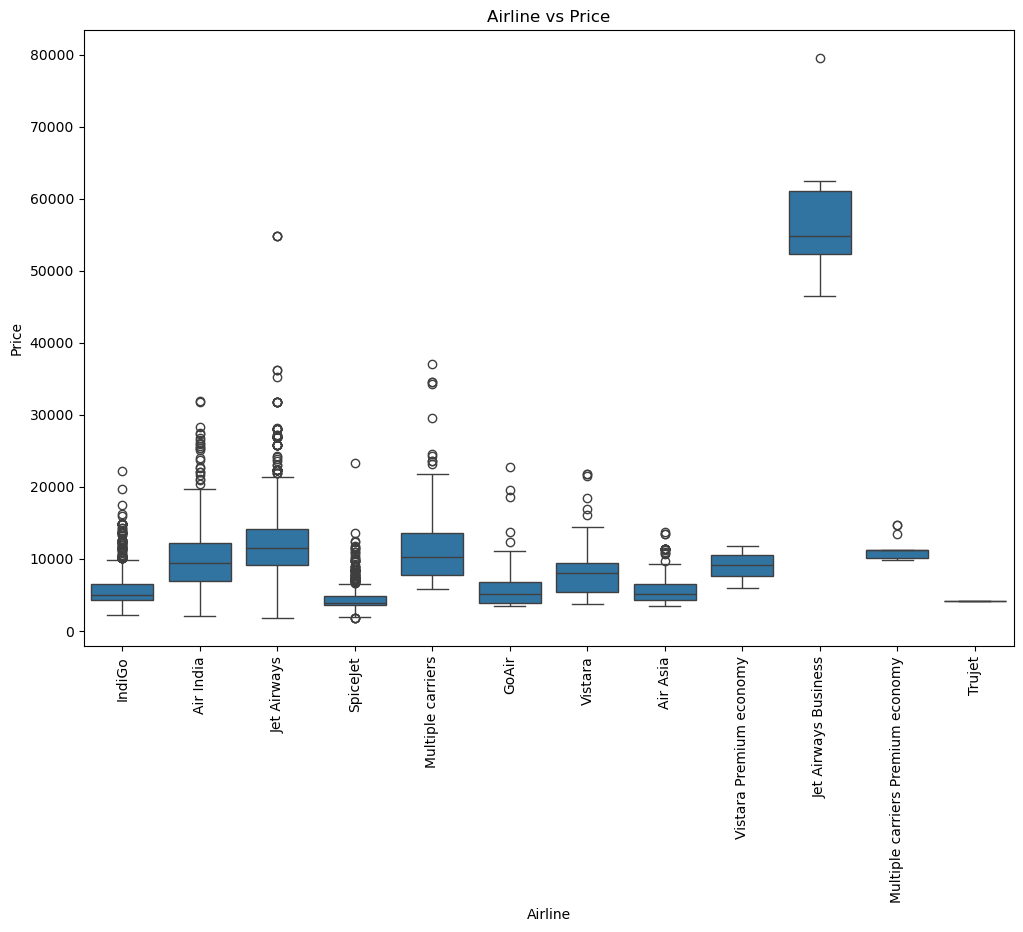

In [105]:
# Plot Airline vs Price
plt.figure(figsize=(12, 8))
sns.boxplot(x='Airline', y='Price', data=df)
plt.title('Airline vs Price')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()

In [106]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding

Airline=df[['Airline']]
Airline=pd.get_dummies(Airline,drop_first=True)

Airline.head().astype(int)

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


##### Column 2 : Source

In [107]:
df['Source'].value_counts()

Source
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

In [108]:
# As Source is Nominal Categorical data we will perform OneHotEncoding

Source=df[['Source']]
Source=pd.get_dummies(Source,drop_first=True)

Source.head().astype(int)

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


##### Column 3 : Destination

In [109]:
df['Destination'].value_counts()

Destination
Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

In [110]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination=df[['Destination']]
Destination=pd.get_dummies(Destination,drop_first=True)

Destination.head().astype(int)

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [111]:
df['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [112]:
# Drop columns not needed
# (Additional info contains a lot of no info, while Route and Total Stops are related to each other)
df.drop(columns=['Route', 'Additional_Info'], axis = 1, inplace=True)

In [113]:
df['Total_Stops'].value_counts()

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

In [114]:
# Convert 'Total_Stops' to numerical
df['Total_Stops'] = df['Total_Stops'].replace({'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4})

In [115]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Hour,Duration_Min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [116]:
# Concatenate dataframe --> train_data + Airline + Source + Destination
data = df
df=pd.concat([df,Source,Destination,Airline],axis=1)

In [119]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Hour,Duration_Min,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False


In [120]:
df.drop(['Airline','Source','Destination'],axis=1,inplace=True)
df.head()

,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Hour,Duration_Min,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,3897,24,3,22,20,1,10,2,50,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False
1,2,7662,1,5,5,50,13,15,7,25,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2,2,13882,9,6,9,25,4,25,19,0,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
3,1,6218,12,5,18,5,23,30,5,25,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
4,1,13302,1,3,16,50,21,35,4,45,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False


In [121]:
df.shape

(10682, 30)

## Feature Selection

In [122]:
df.columns

Index(['Total_Stops', 'Price', 'Journey_Day', 'Journey_Month', 'Dep_Hour',
       'Dep_Min', 'Arrival_Hour', 'Arrival_Min', 'Duration_Hour',
       'Duration_Min', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Cochin', 'Destination_Delhi',
       'Destination_Hyderabad', 'Destination_Kolkata', 'Destination_New Delhi',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy'],
      dtype='object')

In [123]:
#to divide the data into X and y variable for splitting further [not including the target variable i.e Price]
X = df.loc[:, ['Total_Stops', 'Price', 'Journey_Day', 'Journey_Month', 'Dep_Hour',
       'Dep_Min', 'Arrival_Hour', 'Arrival_Min', 'Duration_Hour',
       'Duration_Min', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Cochin', 'Destination_Delhi',
       'Destination_Hyderabad', 'Destination_Kolkata', 'Destination_New Delhi',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy']]
X.head()

,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Hour,Duration_Min,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,3897,24,3,22,20,1,10,2,50,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False
1,2,7662,1,5,5,50,13,15,7,25,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2,2,13882,9,6,9,25,4,25,19,0,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
3,1,6218,12,5,18,5,23,30,5,25,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
4,1,13302,1,3,16,50,21,35,4,45,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False


In [124]:
y = df.iloc[:, 1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

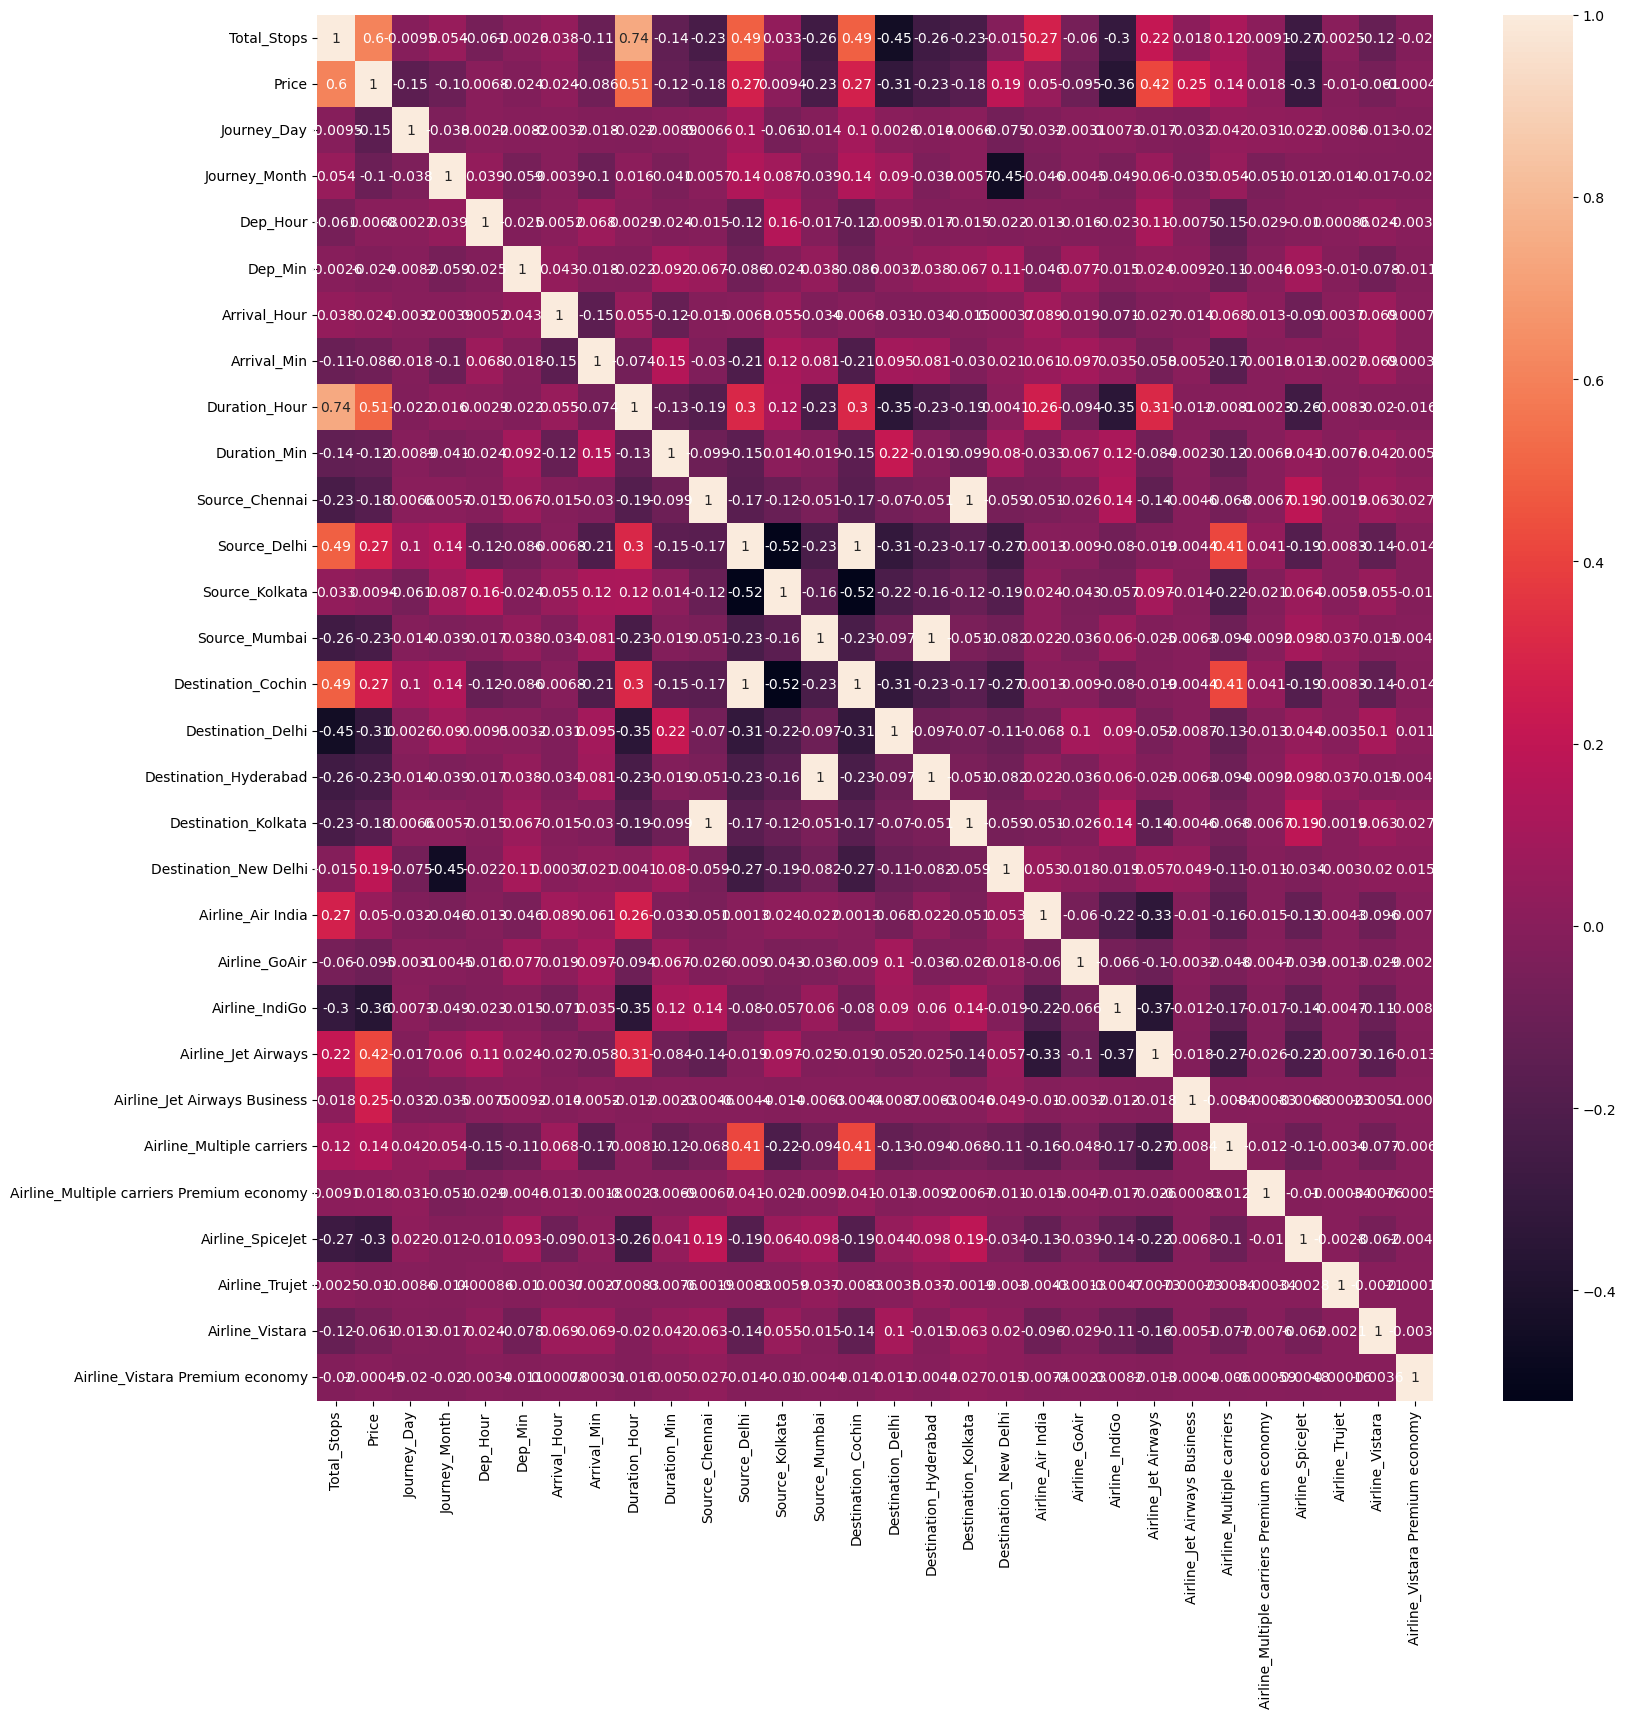

In [125]:
# Finds correlation between Independent and dependent attributes
plt.figure(figsize = (18,18))
sns.heatmap(df.corr(), annot = True)

plt.show()

In [126]:
#function to find the columns that are having the maximum correlation and to get that we have a threshold value
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [127]:
#calling the above function train data set and some specified threshold value and data set- data_train[check cell number 36]
corr_features=correlation(df,0.7)
len(set(corr_features))

4

In [128]:
#name of the column which is highly correlated and can be removed
corr_features

{'Destination_Cochin',
 'Destination_Hyderabad',
 'Destination_Kolkata',
 'Duration_Hour'}

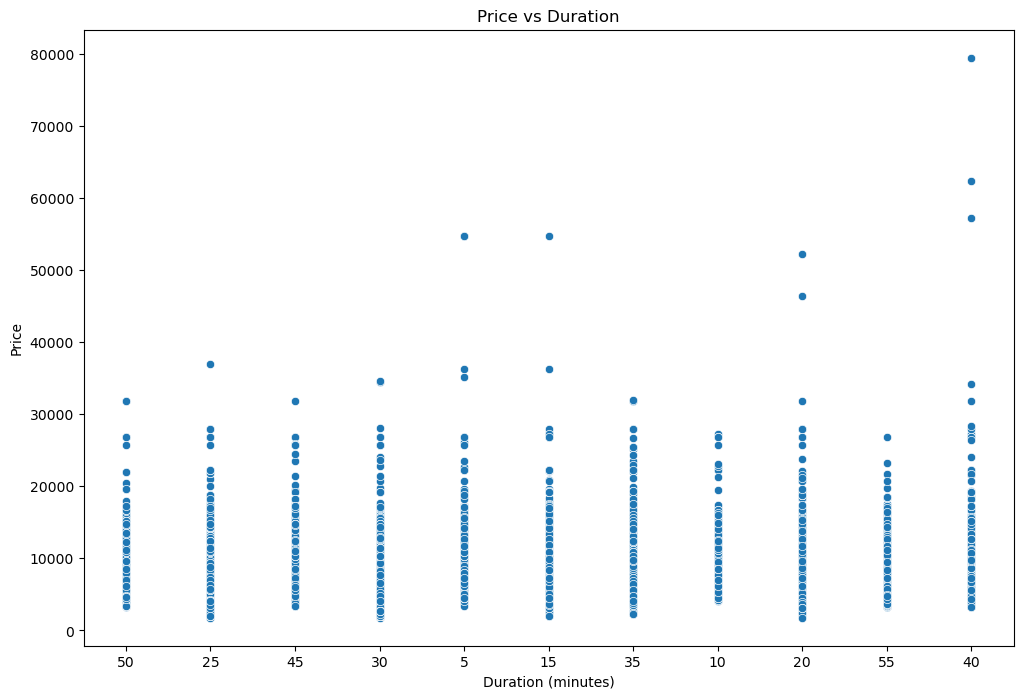

In [41]:
# Plot Price vs Duration
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Duration_Min', y='Price', data=df)
plt.title('Price vs Duration')
plt.xlabel('Duration (minutes)')
plt.ylabel('Price')
plt.show()

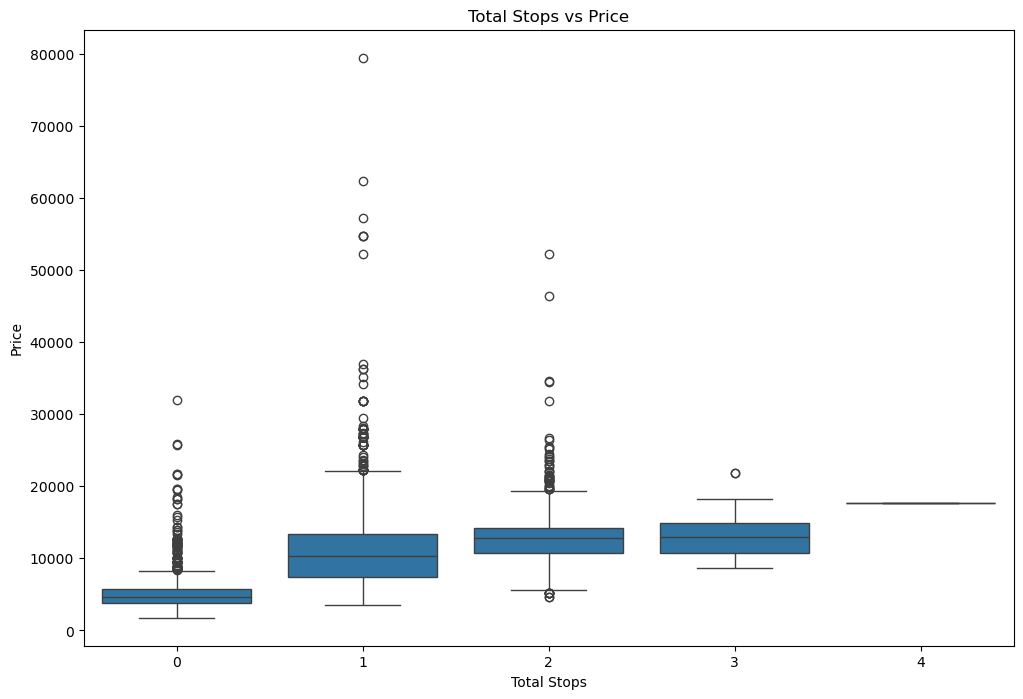

In [42]:
# Plot total stops and price
plt.figure(figsize=(12, 8))
sns.boxplot(x='Total_Stops', y='Price', data=df)
plt.title('Total Stops vs Price')
plt.xlabel('Total Stops')
plt.ylabel('Price')
plt.show()

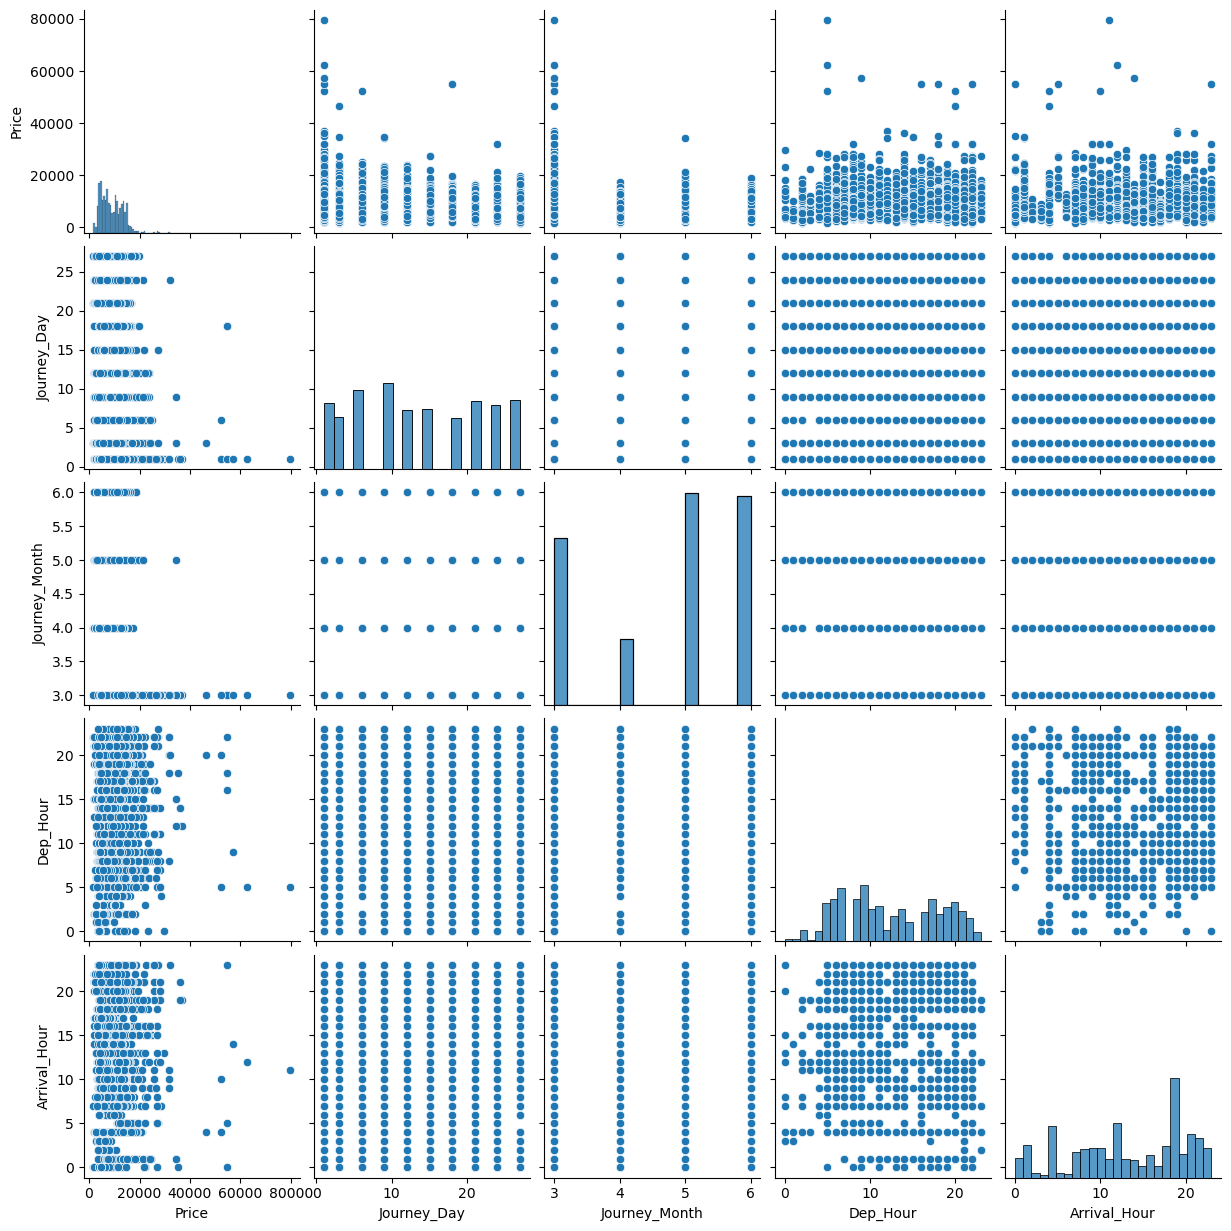

In [43]:
# Pairplot to see relationships between some numerical features and the target
sns.pairplot(df[['Price', 'Journey_Day', 'Journey_Month', 'Dep_Hour', 'Arrival_Hour']])
plt.show()

## Modeling and Evaluation

In [129]:
# Imports
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [130]:
# Define features and target
X = df.drop(columns=['Price'])
y = df['Price']

In [131]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [144]:
# Train a RandomForest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [145]:
# Predict on the test set
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [146]:
# Compute the accuracy, MSE, and R2 for the training set
accuracy_train = rf.score(X_train, y_train)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

In [147]:
# Compute the accuracy, MSE, and R2 for the testing set
accuracy_test = rf.score(X_test, y_test)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

In [148]:
print("Accuracy - Train: {:} Test: {:}".format(accuracy_train, accuracy_test))
print("MSE - Train: {:} Test: {:}".format(mse_train, mse_test))
print("R2 - Train: {:} Test: {:}".format(r2_train, r2_test))

Accuracy - Train: 0.9533646954001073 Test: 0.7981232874801456
MSE - Train: 988181.3647139971 Test: 4352877.0458897175
R2 - Train: 0.9533646954001073 Test: 0.7981232874801456


C:\Users\user\AppData\Local\Temp\ipykernel_16376\523175245.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - y_pred)


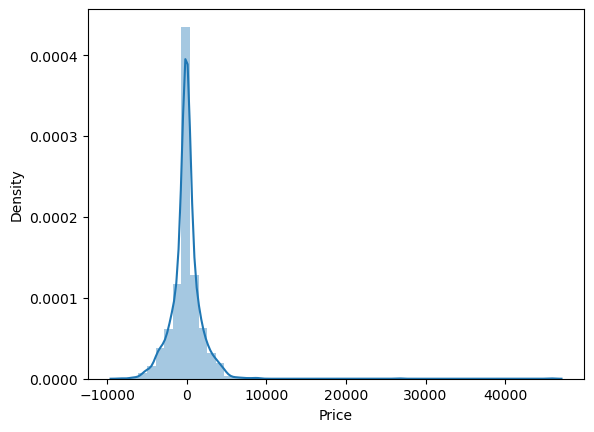

In [142]:
sns.distplot(y_test - y_pred)
plt.show()

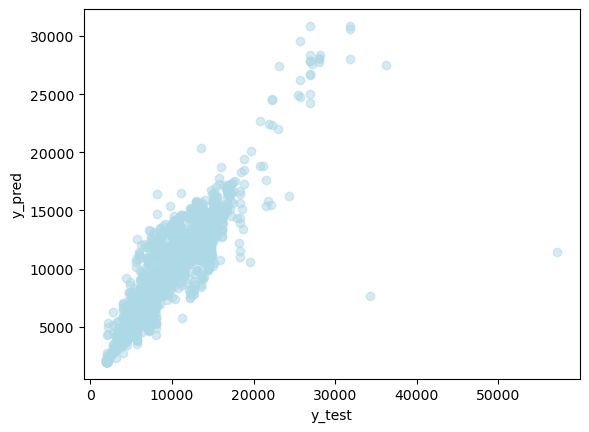

In [137]:
plt.scatter(y_test, y_pred, alpha = 0.5 , color ='lightblue')
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()